In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from textblob import TextBlob 

In [2]:
pwd = os.getcwd().replace("\\", "/")
filepath=os.path.join(pwd,"TASK4 DATASET/twitter_training.csv")
columns = ["ID", "Name", "Sentiment", "Statement"]
df= pd.read_csv(filepath, names=columns, header=None)

In [3]:
df.head()

,ID,Name,Sentiment,Statement
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Name       74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Statement  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
df.describe()

,ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [6]:
df.isnull().sum()

ID             0
Name           0
Sentiment      0
Statement    686
dtype: int64

In [7]:
df = df.dropna(subset=['Statement'])

In [8]:
df['Sentiment_Polarity'] = df['Statement'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
sentiment_counts = df['Sentiment'].value_counts()

In [9]:
df.head()

,ID,Name,Sentiment,Statement,Sentiment_Polarity
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,0.0
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,0.0
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,0.0
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,0.0
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73996 entries, 0 to 74681
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  73996 non-null  int64  
 1   Name                73996 non-null  object 
 2   Sentiment           73996 non-null  object 
 3   Statement           73996 non-null  object 
 4   Sentiment_Polarity  73996 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.4+ MB


In [11]:
df.describe()

,ID,Sentiment_Polarity
count,73996.000000,73996.000000
mean,6430.279231,0.076789
std,3737.660027,0.356014
min,1.000000,-1.000000
25%,3194.000000,-0.070035
50%,6417.500000,0.000000
75%,9595.000000,0.275000
max,13200.000000,1.000000


In [12]:
df.isnull().sum()

ID                    0
Name                  0
Sentiment             0
Statement             0
Sentiment_Polarity    0
dtype: int64

**Sentiment Distribution in Borderlands Tweets**

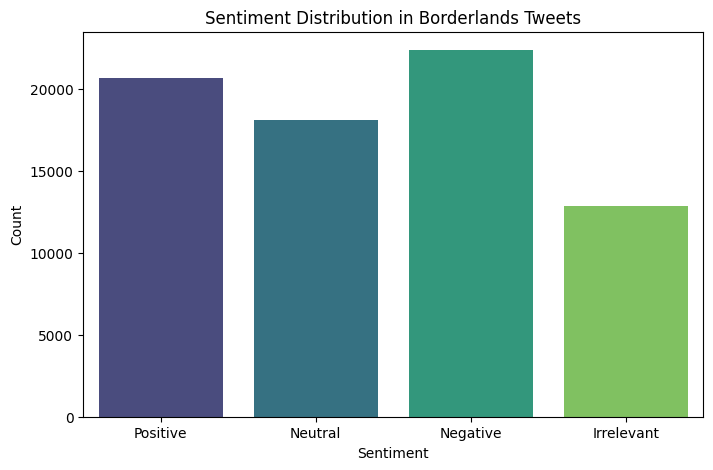

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=df, palette='viridis', hue='Sentiment', legend=False)
plt.title('Sentiment Distribution in Borderlands Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

**Sentiment Analysis by Company**

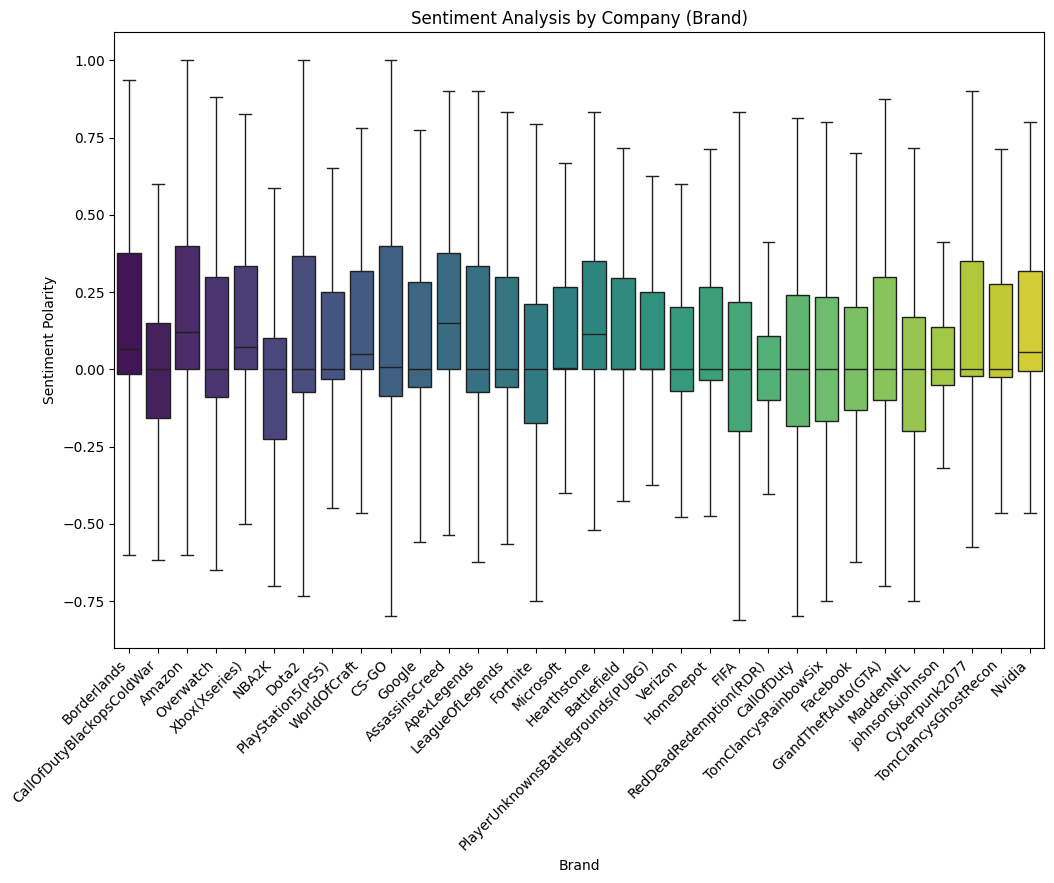

In [14]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Name', y='Sentiment_Polarity', hue='Name', data=df, palette='viridis', showfliers=False, legend=False)
plt.title('Sentiment Analysis by Company (Brand)')
plt.xlabel('Brand')
plt.ylabel('Sentiment Polarity')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()